In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [19]:
dataset = pd.read_csv("Ecommerce_Customers.csv")
dataset.head()

,Email,Address,Avatar,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg Session Length    500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [21]:
dataset['Avatar'].value_counts

<bound method IndexOpsMixin.value_counts of 0                Violet
1             DarkGreen
2                Bisque
3           SaddleBrown
4      MediumAquaMarine
             ...       
495                 Tan
496       PaleVioletRed
497            Cornsilk
498                Teal
499         DarkMagenta
Name: Avatar, Length: 500, dtype: object>

In [22]:
dataset.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg Session Length      0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [23]:
dataset.describe()

,Avg Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<Axes: xlabel='Yearly Amount Spent', ylabel='Count'>

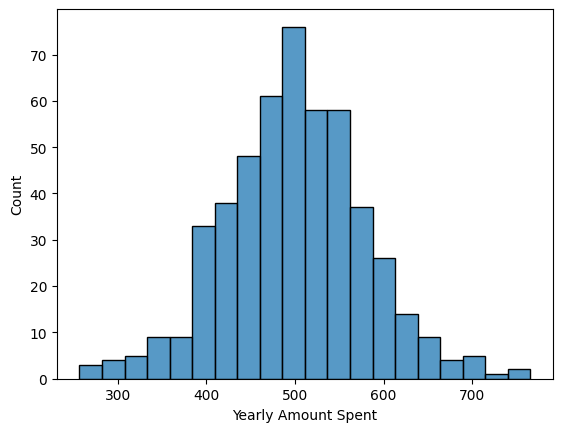

In [24]:
sns.histplot(dataset['Yearly Amount Spent'])

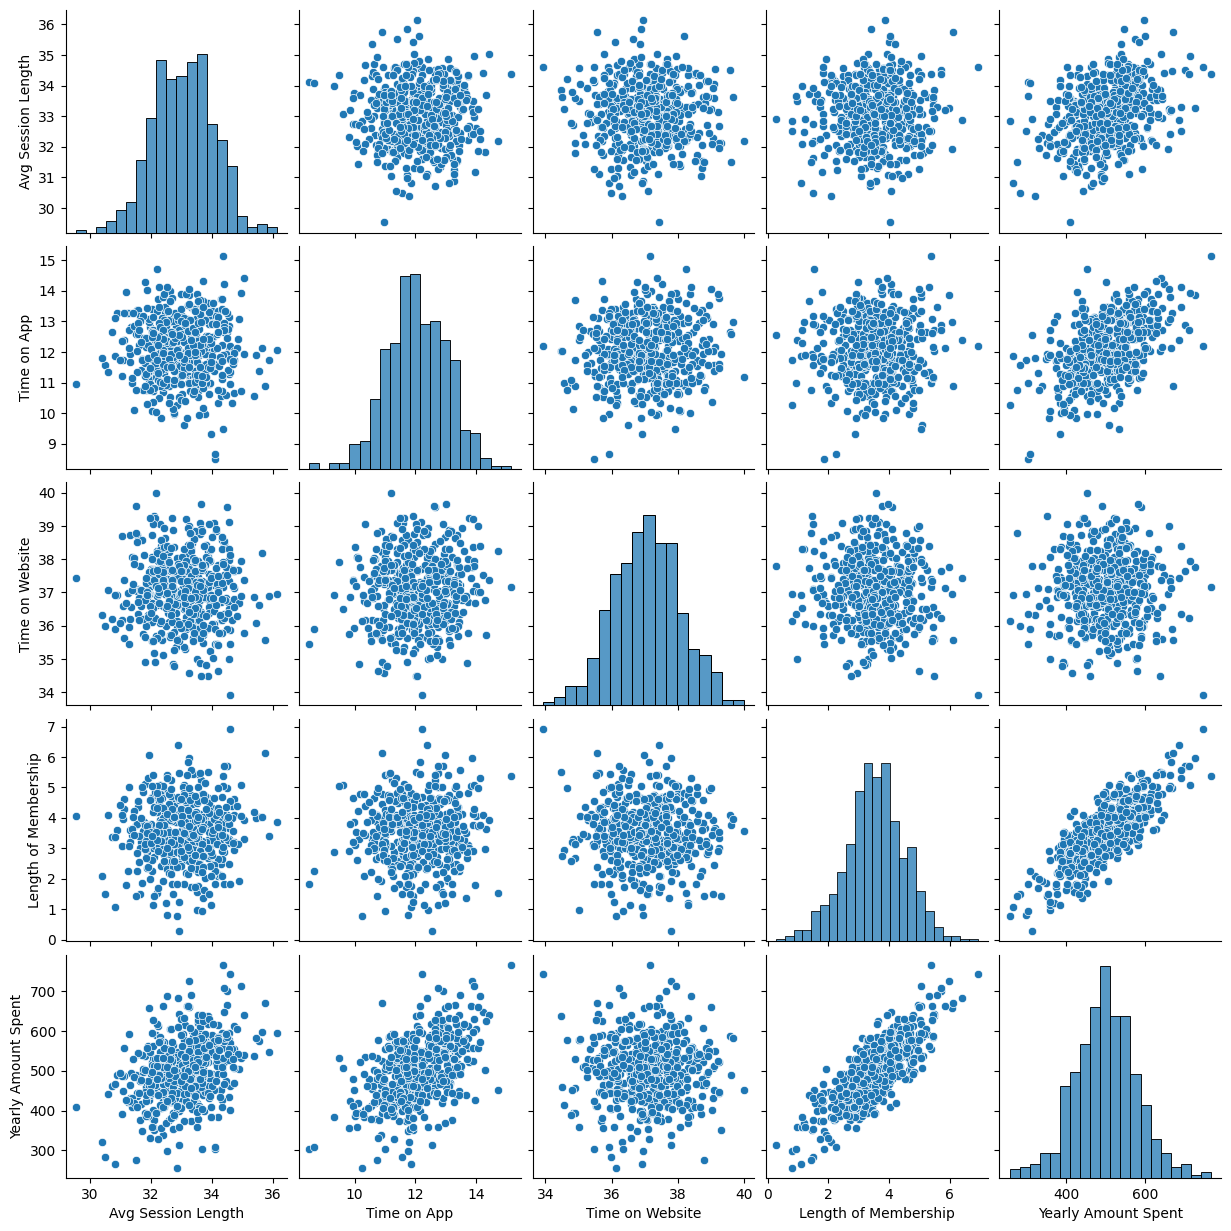

In [25]:
numerical = dataset[['Avg Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]
sns.pairplot(numerical)

<Axes: >

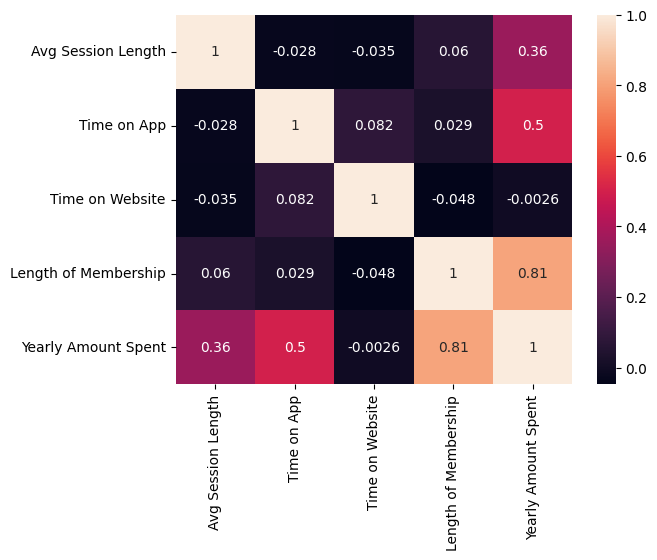

In [26]:
# Corr means all data type should be numerical 
sns.heatmap(numerical.corr(),annot=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8732\3734359346.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Yearly Amount Spent'],color='b')


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

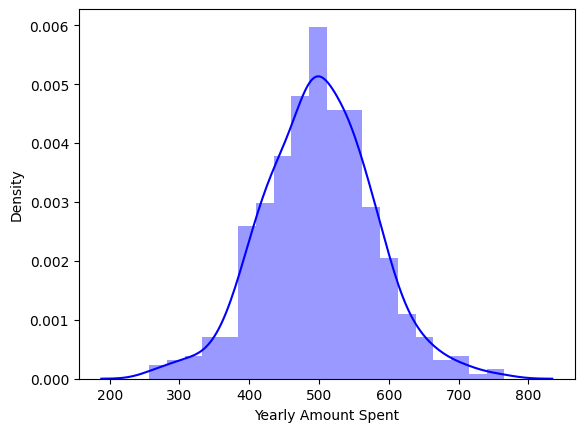

In [27]:
sns.distplot(dataset['Yearly Amount Spent'],color='b')

In [28]:

features = dataset.drop(['Email','Address','Avatar','Yearly Amount Spent'],axis =1)
labels = dataset[['Yearly Amount Spent']]



In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size=0.4,random_state=42)

In [30]:
print(X_train.shape)
print(Y_train.shape)
Y_train

(300, 4)
(300, 1)


,Yearly Amount Spent
467,436.580740
83,338.319863
245,409.070472
165,513.450571
163,490.206600
...,...
106,494.551861
270,540.995739
348,392.810345
435,571.216005


In [31]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()

In [32]:
LinReg.fit(X_train,Y_train)

LinearRegression()

In [42]:
pred = LinReg.predict(X_test)


In [43]:
from sklearn import metrics

print('LinearRegression Score :', LinReg.score(X_train,Y_train))
print('LinearRegression Score :', LinReg.score(X_test,Y_test))
print('LinearRegression Mean Square Error :', metrics.mean_squared_error(Y_test,pred))
print('LinearRegression Root Mean Square Error :', np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print('LinearRegression Mean Absolute Error :', metrics.mean_absolute_error(Y_test,pred))



LinearRegression Score : 0.9851069741028984
LinearRegression Score : 0.9827512766532766
LinearRegression Mean Square Error : 99.74067109516025
LinearRegression Root Mean Square Error : 9.987025137405045
LinearRegression Mean Absolute Error : 8.248206968698351


In [44]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(0.01)

In [45]:
model_L1_reg = lasso_model.fit(X_train,Y_train)

In [46]:
print('LinearRegression Score :', model_L1_reg.score(X_train,Y_train))
print('LinearRegression Score :', model_L1_reg.score(X_test,Y_test))
print('LinearRegression Mean Square Error :', metrics.mean_squared_error(Y_test,pred))
print('LinearRegression Root Mean Square Error :', np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print('LinearRegression Mean Absolute Error :', metrics.mean_absolute_error(Y_test,pred))

LinearRegression Score : 0.9851069198930916
LinearRegression Score : 0.982751691601922
LinearRegression Mean Square Error : 99.74067109516025
LinearRegression Root Mean Square Error : 9.987025137405045
LinearRegression Mean Absolute Error : 8.248206968698351


In [38]:
from sklearn.linear_model import Ridge

In [39]:
rid_reg_model = Ridge(0.2)

In [40]:
rid_reg_model.fit(X_train,Y_train)

Ridge(alpha=0.2)

In [47]:
print('LinearRegression Score :', rid_reg_model.score(X_train,Y_train))
print('LinearRegression Score :', rid_reg_model.score(X_test,Y_test))
print('LinearRegression Mean Square Error :', metrics.mean_squared_error(Y_test,pred))
print('LinearRegression Root Mean Square Error :', np.sqrt(metrics.mean_squared_error(Y_test,pred)))
print('LinearRegression Mean Absolute Error :', metrics.mean_absolute_error(Y_test,pred))

LinearRegression Score : 0.9851066097678356
LinearRegression Score : 0.9827459885183977
LinearRegression Mean Square Error : 99.74067109516025
LinearRegression Root Mean Square Error : 9.987025137405045
LinearRegression Mean Absolute Error : 8.248206968698351
